# This dataset, we will perform step by step 

#### 1. import libraries and load the datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
dataset_train = pd.read_csv('sample/mobileprice_train.csv')
dataset_test = pd.read_csv('sample/mobileprice_test.csv')

#### 2. Data Preprocessing or EDA

In [3]:
dataset_train.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [4]:
dataset_train.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [5]:
dataset_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##### Good direction, no null values, let us check the datatypes and distribution of each columns along with shape and size

In [6]:
dataset_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
dataset_train.shape

(2000, 21)

In [8]:
dataset_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# Let us plot a heatmap to see the correlation between each columns

a = dataset_train.corr().round(3)

<AxesSubplot:>

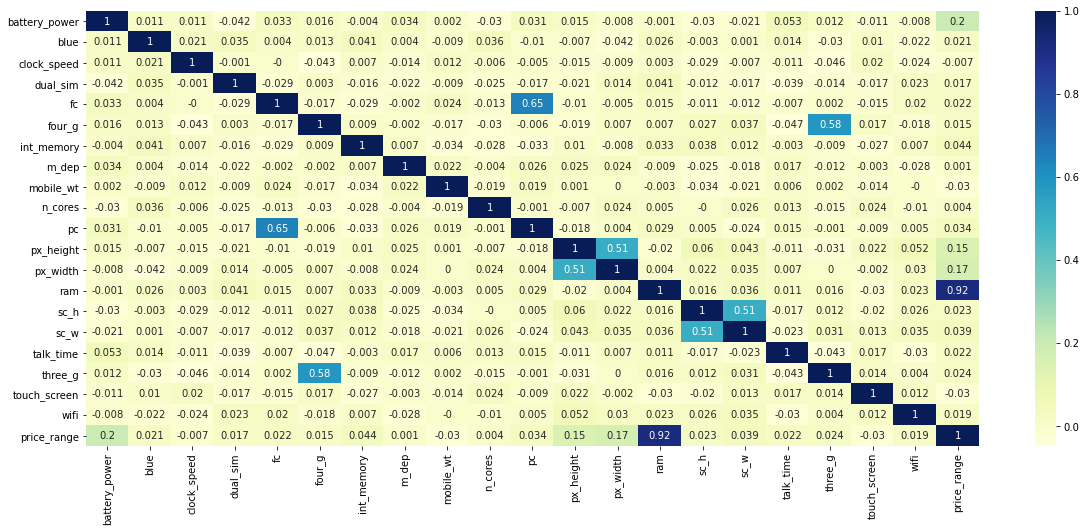

In [10]:
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(a, cmap = 'YlGnBu', annot=True)

#check whether the dataset is balanced or not

fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'price_range',data = dataset_train)
plt.xlabel('Class label')
plt.ylabel('Number of sample')
plt.show()

a['price_range']

# convert these values to absolute value

a['price_range'] = abs(a['price_range'])
a['price_range']

In [11]:
# sort values from lowest to highest

a_sorted = a.sort_values(by = ['price_range'])

a_sorted['price_range']

# select features only wit correlation values above 0.23

features = ['sc_h', 'three_g','touch_screen', 'mobile_wt','pc','sc_w','int_memory','px_height','px_width', 'battery_power', 'ram']

dataset_train = dataset_train[features]

dataset_train.head(15)

In [12]:
x = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values


In [13]:
x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [14]:
y

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [15]:
#perform feature scaling using MinMaxScaler , why because, data distribution is too spread to form single classification


from sklearn.preprocessing import MinMaxScaler as MMC
mmc = MMC()
x = mmc.fit_transform(x)

In [16]:
# 3. Train_test split

from sklearn.model_selection import train_test_split as ttst

x_train, x_test, y_train, y_test = ttst(x,y, test_size = 0.35, random_state = 0)

In [17]:
from sklearn.svm import SVC
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel = 'linear', C = this_C).fit(x_train, y_train)
    training_score = clf.score(x_train, y_train)
    testing_score = clf.score(x_test, y_test)
    print("Linear SVM values of C : {}, training score :{:2f}, testing score :{:2f} ".format(this_C, training_score, testing_score))

Linear SVM values of C : 1, training score :0.952308, testing score :0.945714 
Linear SVM values of C : 3, training score :0.966154, testing score :0.957143 
Linear SVM values of C : 5, training score :0.972308, testing score :0.950000 
Linear SVM values of C : 10, training score :0.974615, testing score :0.960000 
Linear SVM values of C : 40, training score :0.978462, testing score :0.967143 
Linear SVM values of C : 60, training score :0.980769, testing score :0.968571 
Linear SVM values of C : 80, training score :0.980769, testing score :0.968571 
Linear SVM values of C : 100, training score :0.980769, testing score :0.967143 


In [26]:
from sklearn.model_selection import cross_val_score

clf1 = SVC(kernel='linear', C = 30).fit(x_train, y_train)
scores = cross_val_score(clf1, x_train, y_train, cv = 5)

print("The cross validation score: ", + scores)
print("The average cross validation score: ", + scores.mean())

The cross validation score:  [0.95769231 0.95384615 0.97307692 0.96153846 0.95769231]
The average cross validation score:  0.9607692307692307
